In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/Users/chung/Library/Fonts/NanumGothic.otf', 
    name='NanumGothic')                     
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가 (0,fe):가장 우선순위로 추가하겠다는 뜻
plt.rcParams.update({'font.size': 11, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rc('font', family='NanumGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
# from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

In [2]:
apt_data_v1 = pd.read_csv('apt_data_v1_clean.csv', na_values=['', ' ', 'NA'])


In [ ]:
# subway_df = pd.read_csv('/Users/chung/JupyterNotebook/ML 경진대회/data/subway_feature.csv')

In [7]:
# 아파트 데이터
apt_df = apt_data_v1.copy()
apt_coords = np.radians(apt_df[['좌표Y', '좌표X']].values)

# 지하철 데이터
subway_df = pd.read_csv('/home/myproject/ML 경진대회/data/subway_feature.csv')
subway_coords = np.radians(subway_df[['위도', '경도']].values)

In [13]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    R = 6371000  # 지구 반지름 (m)

    dlat = lat2 - lat1[:, np.newaxis]      # Broadcasting
    dlon = lon2 - lon1[:, np.newaxis]

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1[:, np.newaxis]) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c


In [14]:
#거리 계산 (모든 아파트 ↔ 모든 지하철역)

# 각 좌표 분리
apt_lat, apt_lon = apt_coords[:, 0], apt_coords[:, 1]
sub_lat, sub_lon = subway_coords[:, 0], subway_coords[:, 1]

# 거리 계산 (n_apts x n_subways)
distances = haversine_vectorized(apt_lat, apt_lon, sub_lat, sub_lon)


In [15]:
# 800m 이하인 거리 True → sum으로 개수
within_800m = (distances <= 800).sum(axis=1)

# 결과 추가
apt_df['800m_지하철역_개수'] = within_800m

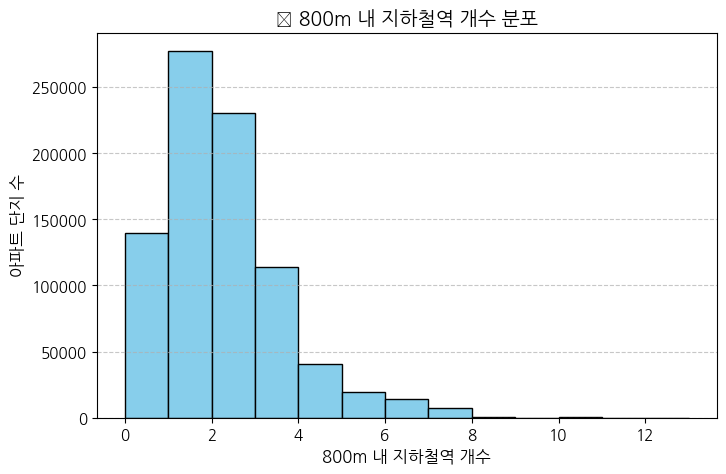

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(apt_df['800m_지하철역_개수'], bins=range(apt_df['800m_지하철역_개수'].max() + 2), color='skyblue', edgecolor='black')
plt.title('📊 800m 내 지하철역 개수 분포', fontsize=14)
plt.xlabel('800m 내 지하철역 개수', fontsize=12)
plt.ylabel('아파트 단지 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
